> **Сохранить копию блокнота себе**

Ссылка на блокнот Google Colaboratory: https://colab.research.google.com/drive/1Vq0vXTMAW71omxNAoJCcJSPoDaQSk6fE?usp=sharing

Этот блокнот по ссылке можно лишь просматривать. Для редактирования вам нужно сохранить себе его копию:

***Файл -> Сохранить копию на Диске***

Альтернативный вариант. Вы можете скачать ipynb файл из github и затем открыть его в Google Colaboratory:

***Файл -> Открыть блокнот -> Загрузить***

# **Немного вспомним прошлое занятие.**

Для всякого алгоритма обучения с учителем:

* Необходимо найти приближённую функцию отражающая скрытую зависимость (закономерность) между входом $X$ и выходом $Y$, которые составляют обучающую выборку.

* Для этого в процессе обучения необходимо найти оптимальные параметры модели, дающие минимальное расхождение между истинным значением $Y$ и предсказанным $\hat{Y}$. 

* В результате, обученный алгоритм должен делать обобщение всех изученных данных обучающей выборки и теперь зная определённую зависимость, предсказывать правильные результаты на невиданных ранее образцах.

В общем случае, задачи обучения с учителем делятся на следующие типы:
1. **Классификация (Classification):** геометрический смысл задачи классификации, состоит в построении разделяющей функции между объектами, имеющие разные метки класса. Построив такую функцию, для любого нового объекта, можно будет предсказать к какому классу он относится.
2. **Регресиия (Regression):** геометрический смысл задачи регрессии, состоит в том, что она пытается описать взаимосвязь (зависимости) между известным $X$ и $Y$ в виде некоторой функции. После её построения, (то есть обучения модели на этих данных) появляется возможность использовать новые $X$ и предсказать для них целевое значение $Y$.

> Если есть какие-то пробелы и непонимание, настоятельно рекомендую ещё раз освежить знания с предыдущего занятия прежде чем приступать к данному.

---

# **Линейная регрессия**

> ***Линейная регрессия*** - алгоритм машинного обучения с учителем, который описывает зависимость между известным входным $X$ и выходной переменной $Y$ в виде линейной функции. 

* Линейная регрессия является одним из наиболее часто используемых алгоритмов в машинном обучении. Этот алгоритм зачастую дает хороший результат даже на небольших наборах данных.

* Широкое применение линейной регрессии обусловлено тем, что большое количество реальных процессов в науке, экономике и бизнесе можно описать линейными моделями. Так, с помощью линейной регрессии можно оценивать объем ожидаемых продаж в зависимости от установленной цены.

> Пусть нам известны две непрерывные характеристики:
  * $X$ - векторы признаков, характеризующие объекты или наблюдения.
  * $Y$ - целевой признак. По-сути, это множество правильных ответов, которые модель должна стремиться предсказывать в процессе обучения, на основе входных данных $X$.

> Есть гипотеза, что имеется линейная статистическая зависимость между $X$ и $Y$ (линейная закономерность).

> Следует отметить, что для иллюстрации мы рассматриваем ***парную линейную регрессию***. Это значит, что у нас в $X$ содержится только один входной вектор признаков $x_0$. Конечно, на практике парная регрессия почти не встречается, но на таком простом примере мы поймем основные концепции алгоритмов машинного обучения основанные на обучении с учителем.

> Если у нас нас $n$ векторов признаков $X = \{x_0, x_1, ..., x_n\}$, такая регрессия называется ***множественной***.

Рассмотрим рисунок ниже.

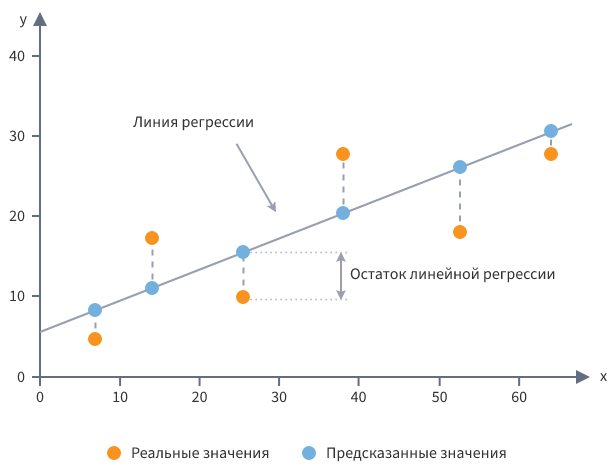

* Природа наших ***реальных значений*** данных описываются функцией вида: $y = b + w⋅x + ϵ$
  * где $b$ - сдвиг по оси $y$ (длина отрезка, отсекаемого на координатной оси прямой $y$). Характеризует среднюю величину $y$, когда переменная $x$ равна 0.
  * $w$ - наклон прямой. Характеризует среднюю величину изменения переменной $Y$.
  * ϵ - случайный фактор (остаток линейной регрессии), вносящий некоторый вклад в $y$, который мы не учли. Она не зависит от $x$.
* По-скольку учесть случайный фактор невозможно, эти данные можно лишь описать в виде оценочной (аппроксимирующей) линейной функции (уравнение прямой): $\hat{y} = \hat{b} + \hat{w}⋅x$ которая будет наилучшим образом обобщать наши данные и выражать скрытую зависимость между $x$ и $y$. На рисунке это линия регрессии.

***Замечание:*** 

> Множественная регрессия определяется как: $y = \hat{b} + ∑ \hat{w_i}⋅x_i + ϵ_i$

---

###**Что необходимо найти, чтобы сказать, что мы знаем такую зависимость? Необходимо найти оптимальные параметры модели!**

> Найти коэффиценты $\hat{b}$ и $\hat{w}$ оценочной линейной регрессии: $\hat{y} = \hat{b} + \hat{w}⋅x$. **Эти коэффиценты являются параметрами модели**.

> Геометрически необходимо найти такую функцию, чтобы она наилучшим образом описывала зависимость данных. Чтобы она отображала входные значения в выходные как можно более точно или другими словами, чтобы точки данных ($x_i$, $y_i$) максимально плотно лежали к нашей функции.

> Для простоты дальше оценочные параметры $\hat{b}$ и $\hat{w}$ будем обозначать просто как $b$ и $w$.

---

###**Как найти эти коэффиценты? Используем функцию ошибки!**

Обратите внимание на картинки. Логично, что при разных значениях параметров модели получаются разные линейные функции (разные предсказания $\hat{y}$). Для того, чтобы подобрать модель с наилучшими параметрами, нам нужно средство измерения “точности” модели, некоторая функция, которая бы нам показала, насколько модель хорошо или плохо соответствует имеющимся данным.

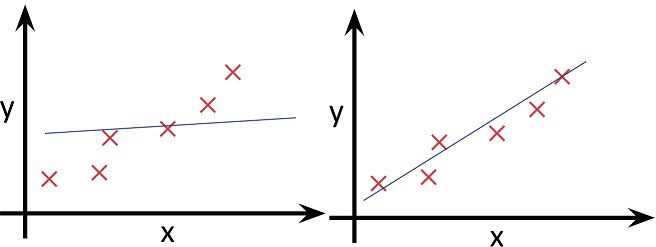

Такая функция называется **Функцией ошибки (Loss Function)**. Она измеряет общее отклонения (общую ошибку) предсказанных значений моделью $\hat{y}$ от . Чем выше значение функции ошибки, тем хуже модель описывает зависимость данных. Если модель полностью соответствует данным, то значение функции ошибки будет нулевым.

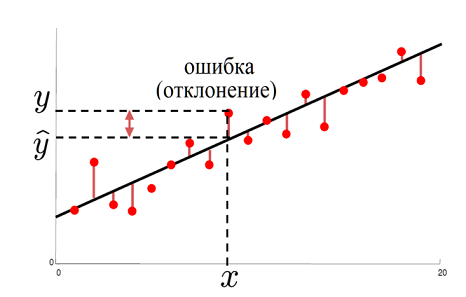

Существует огромное количество функций ошибок. В задачах регрессии в качестве функции ошибки чаще всего берут **Среднеквадратичное отклонение (Mean Squared Error)**:

>$MSE = \frac{1}{N}∑(y_i-\hat{y_i})^2 = \frac{1}{n}(y-\hat{y})^2$

> Вычисляется квадратная разница между всеми истинными значениями признака $y$ и всеми предсказаниями $\hat{y}$, а затем эти значения усредняются.

Возведение в квадрат в этой формуле нужно для того, чтобы положительные отклонения не компенсировали отрицательные при суммировании (ведь если будет ошибка у одной точки даных -5, а у другой +5 то их сумма даст 0). Можно было бы для этого брать, например, абсолютное значение разности $|y_i-\hat{y_i}|$, но эта функция не везде дифференцируема, а это важно в процессе поиска минимума функции.


Таким образом, функцию ошибки необходимо минимизировать. То есть найти её минимум.

---

##**Как минимизировать функцию ошибки? Использовать методы оптимизиции!**

Сперва, обратите внимание, что в качестве аргументов у функции ошибки выступают параметры $b$ и $w$ нашей линейной функции. **Таким образом, результирующая ошибка зависит именно от них!!**

> $MSE(b,w) = \frac{1}{n}(y-\hat{y})^2 => \frac{1}{n}(y-(b+wx))^2$

Нужно найти такие параметры $b$ и $w$, чтобы ошибка была близка к нулю, то есть к минимуму функции. Нулю она может быть равна когда наша прямая проходит ровно через все точки данных, но таких данных на практике не бывает, поэтому мы можем найти лишь оптимальный минимум.

Давайте ради наглядности, для следующего набора смоделированных данных, сделаем тупо перебор всех значений $b$ и $w$ и отобразим всю нашу функцию ошибки на графике и заодно найдём минимальную ошибку и оптимальные $b$ и $w$ после перебора.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Смоделируем данные
x = np.random.rand(100, 1) # создаём вектор признак из 1000 случайных чисел в диапазоне 0..1
y = 5 + 5 * x  + np.random.randn(100, 1) * 0.3 # строим функцию описывающие данные (пусть b и w будут 5) и добавляем немного гауссова шума (эпсилон) для каждого элемента данных

plt.figure(figsize=(10, 10))
plt.plot(x, y, 'ro') # отображаем наши данные
plt.xlabel('X') # название оси X
plt.ylabel('Y') # название оси Y
plt.show()

In [ ]:
# Определим область наших параметров (от -20 до 20, всего будет 41 элемент, включая 0)
w_list = np.linspace(-20, 20, 41)
b_list = np.linspace(-20, 20, 41)
error = [np.mean((y - (b+w*x))**2) for b in b_list for w in w_list] # вычислим функцию ошибки MSE перебирая все параметры

error = np.array(error).reshape((41, 41))
w_list, b_list = np.meshgrid(w_list, b_list) # создадим координатную плоскость из осей w и b

min_i, min_j = np.where(error == np.min(error)) # найдём индекс минимальной ошибки
min_error = np.min(error) # найдём саму ошибку
best_w, best_b = w_list[min_i, min_j], b_list[min_i, min_j] # найдём по индексу наши w и b
print("Минимальная ошибка: ", min_error)
print("Лучший w: ", best_w)
print("Лучший b: ", best_b)

# Построим 3D график
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_list, b_list, error, cmap=plt.cm.jet, alpha=0.5) # строим 3D поверхность
ax.scatter3D(best_w, best_b, min_error, c = 'red', marker='X', s=100) # отобразим минимальную точку
ax.set_title('Среднеквадратичная ошибка (MSE) для парной регрессии')
ax.set_xlabel('W') # название оси x
ax.set_ylabel('B') # название оси y
ax.set_zlabel('MSE'); # название оси z
ax.view_init(10,30)
plt.show()

На графике видим, точку минимума при значениях $b=5$ и $w=5$

После нахождения параметров построим нашу линейную регрессию

In [ ]:
y_pred = best_b+best_w*x

plt.figure(figsize=(10, 10))
plt.plot(x, y, 'ro') # отобразим данные
plt.plot(x, y_pred) # отобразим полученную линейную регрессию
plt.show()

Естественно, на практике никто подброром параметров моделей не занимается, ведь это дорого с вычислительной точки зрения.

---

####**Производная**

Как же дать знать машине где находится минимум у Функции ошибки? Как же нам автоматизировать процесс поиска оптимальных $b$ и $w$, дающие минимальную ошибку? Здесь вступает в игру ***производная функции.***

Мы не будем вдаваться глубоко в математику, а попытаемся на пальцах понять особенности производной.

> **Производная** показывает скорость роста и уровень крутизны функции в определённой точке.

> Её геометрический смысл — показать угол, под которым в данной точке проходит касательная к функции. При этом касательная имеет вид $y=k⋅x + b$, где $k$ это значение производной - угловой коэффицент. Кроме этого, производная равна тангенсу угла наклона этой касательной $f'(x)=tg(α)$.

> ***По сути, вот эта касательная показывает уровень крутизны в области конкретной точки. Насколько он велик или низок и какое его направление. Производная всегда показывает в сторону возрастания функции***

Давайте исследуем производную на примере параболы на двумерном графике. Посмотрим и внимательно проанализируем касательные в разных точках параболы на следующей картинке и направления производных в точках:

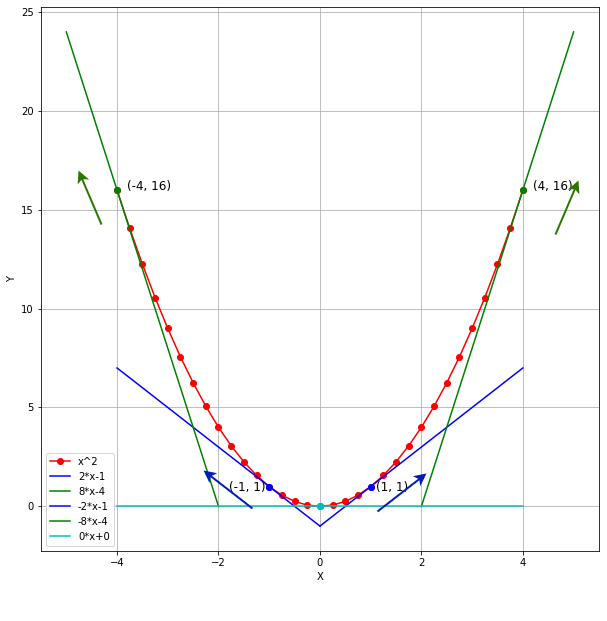

1. Посчитаем производную для $y=x^2$ при $x=4$. Получаем $2⋅x=8$. Получается угловой коэффицент касательной $k = 8$. Построим эту касательную так, чтобы она проходила через точку (4, 16). Касательная будет иметь вид $y=8x-4$
2. Посчитаем производную для параболы при $x=1$. Получаем $2⋅x=2$. Получается угловой коэффицент касательной $k = 2$. Построим эту касательную так, чтобы она проходила через точку (1, 1). Касательная будет иметь вид $y=2x-1$
3. Посчитаем производную для параболы при $x=0$. Получаем $2⋅x=0$. Получается угловой коэффицент касательной $k = 0$. Построим эту касательную так, чтобы она проходила через точку (0, 0). Касательная будет иметь вид $y=0x-0$.
4. Посчитаем производную для параболы при $x=-4$. Получаем $2⋅x=-8$. Получается угловой коэффицент касательной $k = -8$. Построим эту касательную так, чтобы она проходила через точку (-4, 16). Касательная будет иметь вид $y=-8x-4$
5. Посчитаем производную для параболы при $x=-1$. Получаем $2⋅x=-2$. Получается угловой коэффицент касательной $k = -2$. Построим эту касательную так, чтобы она проходила через точку (-1, 1). Касательная будет иметь вид $y=-2x-1$

**Для ещё большей наглядности отобразим все касательные в виде обычных прямых на отдельном графике.**

> Здесь для наглядности добавим ещё производную для параболы при $x=10$ и $x=-10$. Получаем $20$ и $-20$. Получается угловой коэффицент касательной одной $k = 20$, а для другой $k = -20$.

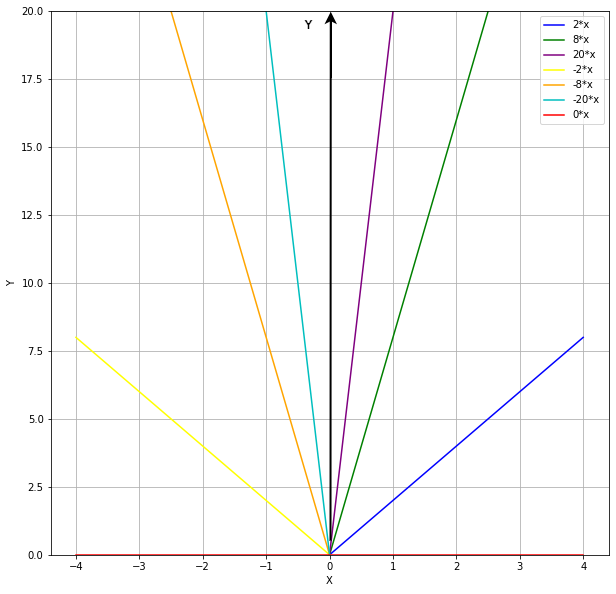

***Какие выводы можно сделать из всех этих картинок?***

* Мы видим, что чем точка дальше от минимума, тем производная больше, то есть угловой коэффицент касательной $k$ (крутизна) становится больше, а касательная стремится к вертикальной линии.

* Мы видим, что чем точка ближе к минимуму, тем производная меньше, то есть угловой коэффицент касательной $k$ (крутизна) становится меньше, а касательная стремится к горизонтальной линии.

* Мы видим, что когда точка в минимуме, её производная, то есть угловой коэффицент касательной (крутизна) равен нулю, а касательная приобретает вид горизонтальной линии.

* Если производная в точке отрицательна, значит функция в области точки убывает и оптимум находится справа от данной точки.

* Если же производная положительна, то все наоборот - функция возрастает, оптимум находится слева

Когда мы на уроках мат. анализа искали минимум функции, мы приравнивали производную к нулю. По сути, если производную (а значит, угол касательной) приравнять к нулю, то мы найдем точки, в которых касательная имеет горизонтальный вид (то есть параллельна оси абсцисс). В нашем примере, такая точка одна, ведь мы имеем дело с параболой у которой один оптимум.

---

####**Метод оптимизации "Градиентный спуск"**

> **Примечание:** Таким образом, в нашей ситуации логично, что простейший способ найти минимум у функции $MSE(b, w)$ зависимой от двух переменных — вычислить частные производные по $b$ и $w$, приравнять их нулю и решить систему линейных уравнений и таким образом мы найдём оптимальные $b$ и $w$. Такой метод называется ***метод наименьших квадратов (МНК)***. 

>Мы же будем рассматривать **метод градиентного спуска**. Этот метод (а точнее его модификации, которые мы рассмотрим в дальнейших занятиях) используется во многих моделях машинного обучения, в том числе и нейронных сетях. Кроме этого, в отличие от МНК этот алгоритм менее требователен к вычислительным ресурсам при большой размерности количества признаков.

Давайте воспользуемся свойствами производной, которые мы с вами изучили выше. Если производная показывает направление роста функции и уровень крутизны в виде числа, почему бы нам не развернуть это направление в сторону минимума, а значение производной использовать как шаг, который нам нужно сделать от текущего нашего местоположения в функции.

То есть, мы хотим двигаться к минимуму с помощью производной $x_{новый} = x_{текущий} - f(x_{текущий})'$. 

Однако такой шаг может быть слишком огромным и мы можем случайно перешагнуть минимум. Чтобы мы могли регулировать это, давайте введём параметр размер шага λ и умножим его на значение производной $f(x)'$. Таким образом, мы будем делать шаги итеративно следующим образом: $x_{новый} = x_{текущий} - λ⋅f(x_{текущий})'$

**Давайте на примере параболы $f(x) = x^2$ дойдём до минимума со стартового значения $x=-10$. Пусть размер шага λ будет равным 0.3**.

* $x_{1} = -20$
* $x_{2} = x_1 - λ⋅f(x_2)' = -10 - (0.2⋅2⋅-10) = -10+4=-6$
* $x_{3} = x_2 - λ⋅f(x_2)' = -6 - (0.2⋅2⋅-6) = -6 + 2.4 = -3.6$
* $x_{4} = x_3 - λ⋅f(x_3)' = -3.6 - (0.2⋅2⋅-3.6) = -3.6+1.44=-2.16$
* $x_5 = x_4 - λ⋅f(x_4)' = -2.16 - (0.2⋅2⋅-2.16) = -2.16+0.864 = -1.296$
* $x_6 = x_5 - λ⋅f(x_5)' = -1.296 - (0.2⋅2⋅-1.296) = -1.296+0.5184=-0.7776$
* $x_7 = x_6 - λ⋅f(x_6)' = -0.7776 - (0.2⋅2⋅-0.7776) = -0.7776+0.31104=-0.46656$
* и так далее

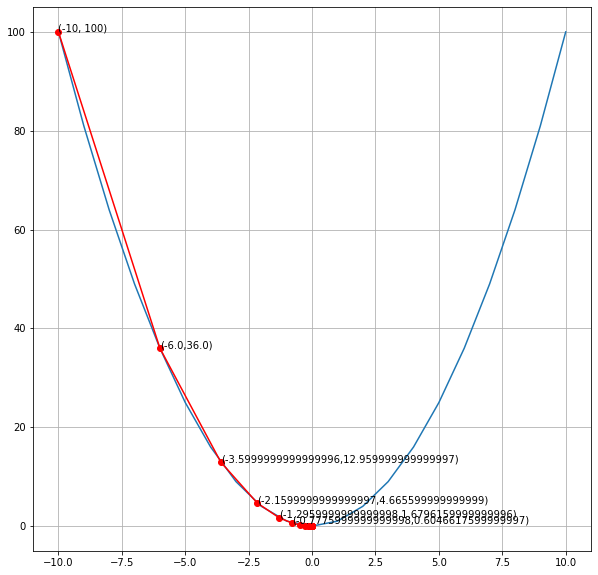

Таким образом, рассчитав производную в случайной точке, сделав шаг, пропорциональный величине производной и в направлении, противоположном ей, можно повторить процесс и еще больше приблизиться к оптимуму. С каждой итерацией мы будем приближаться к минимуму ошибки. Приближаясь к минимуму, крутизна уменьшается, производная тоже и шаг пропорциональный величине производной соответственно тоже и мы начинаем автоматически потихоньку тормозить. На таких принципах по сути строится простейший градиентный спуск.

***Общий алгоритм стандартного градиентного спуска***

1. Генерация параметров модели случайным образом $W=(w_0, w_1,...w_n)$. (Выбираем случайную точку в функции)
2. Для текущих параметров модели осуществляется предсказание, то есть нахождение $\hat{y}$.
3. Осуществляется расчёт частной производной Функции ошибки $\frac{\partial LossFunction(w_0,w_1,...,w_i)}{\partial w_i}$ при текущих параметрах модели.
 
 Обновляем каждый текущий параметр модели по следующему принципу:

 > $w_{i+1}=w_i-λ\cdot\frac{\partial LossFunction(w_0,w_1,...,w_i)}{\partial w_i}$
 
 где λ - размер шага или как часто называют скорость обучения (learning rate). Если значение данного параметра слишком велико, то мы вероятно будем постоянно промахиваться и не попадать в минимум. Если значение слишком низкое, то мы будем слишком долго приближаться к минимуму. Необходимо подбирать значение данного параметра для лучшего результата.

4. Возвращаемся в пункт 2.

  Повторяем алгоритм градиентного спуска до тех пор, пока значение функции ошибки не перестанет значимо изменяться. Это будет означать, что мы уже достаточно близко к минимуму и дальнейшие шаги градиентного спуска слишком малы, чтобы быть целесообразными.

> **Попробуйте поэксперементировать ниже с разными значениями размера шага (learning rate) λ и посмотреть и понять как он влияет на результаты в процессе градиентного спуска.**

> **Для наглядной иллюстрации пусть функция ошибки якобы будет снова парабола $f(x)=x^2$ которую нужно минимизировать и найти в результате минимум.**

* **Посмотрите, что будет при $λ = 0.9, 0.7, 0.5, 0.1, 0.01$**

* **Посмотрите, что будет если размер шага не брать (поставить $1$)**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

learning_rate = 0.9 # размер шага (скорость обучения)
x_point = -10 # например случайно был сгенерирован x равный -10. Это наш старт от которого мы будем двигаться к минимуму

In [ ]:
# функция параболы f(x) = x**2
def parabola(x):
  y = x**2
  return y

# функция производной параболы f(x)' = 2*x
def derivative(x):
  return 2*x

all_steps = []

# будем выводить параболу в значениях от -10 до 10 по x
x = np.linspace(-10, 10, 21)
# используя x рассчитаем значения y с помощью нашей функции parabola()
y = parabola(x) 

# сделаем 20 раз шагов в сторону минимума
for i in range(20):

  # сохраняем текущий x в массив all_steps
  all_steps.append(x_point) 

  # делаем шаг: "текущий x - (размер шага * производная функции от зависимой переменной в текущем x)"
  x_point = x_point - (learning_rate * derivative(x_point))

# Выведем график параболы и наше движение к минимуму
plt.figure(figsize=(10, 10)) # figsize - размер графика
plt.plot(x, y) # строим параболу
plt.plot(all_steps, parabola(np.array(all_steps)), '-ro') # строим все наши шаги
plt.grid()
plt.show()

***Почему метод называется градиентный спуск?***

> Когда мы работаем не с одной переменной, а когда наша функция зависит от целого вектора параметров $f(w_0, w_1,...,w_n)$, по которым берут частные производные, то такой вектор производных называется ***градиентом***.
Градиент часто обозначается как $grad$ $f(w_0, w_1...,w_n)$ или же $\nabla f(w_0, w_1..., w_n) = (\frac{\partial f}{\partial w_0}, \frac{\partial f}{\partial w_1},...,\frac{\partial f}{\partial w_n})$

> По сути градиент это своего рода производная вычисляющаяся в многомерном пространстве.

---

**Реализация градиентного спуска для минимизации функции ошибки $MSE(b,w)$ для парной линейной регрессии.**

Теперь, когда мы поняли что такое градиентный спуск, давайте реализуем его для минимизации функции $MSE(b,w)$, зависящую от двух перменных $b$ и $w$.

1. Следуя алгоритму выше, сперва, сгенерируем случайным образом $b$ и $w$.
2. Для текущих параметров модели сделаем предсказание (построим линейную регрессию)
  $\hat{y} = b+w⋅x$

3. Теперь, давайте найдем частные производные (или градиент) среднеквадратической функции ошибки $MSE(b, w)$ по двум нашим параметрам и напишем обновления этих параметров модели. Производная считается отдельно для каждого параметра модели:

***Для параметра b (помните что w в таком случае становится константой)***

$\frac{\partial MSE(b, w)}{\partial b} = (\frac{1}{n}(y-\hat{y})^2)' = (\frac{1}{n}(y-(b+wx))^2)'$

1. Постоянный множитель: $(cu)' = c\cdot u'$

  $\frac{1}{n}((y-(b+wx))^2)'$

2. Сложная функция: $u^n(b)' = n\cdot u^{n-1}(b) \cdot u(b)'$

  $2⋅\frac{1}{n}((y-(b+wx))⋅(y-(b+wx))'$

3. Сумма и разность: $(u+v-w)'=u' + v' - w'$

  $2⋅\frac{1}{n}((y-(b+wx))⋅(0-1-0))$ = $-2⋅\frac{1}{n}(y-(b+wx))$ = $-2⋅\frac{1}{n}(y-\hat{y})$

  **Обновим теперь наш параметр модели:**

  $b = b - λ * b_{grad}$

  где $b_{grad} = -2⋅\frac{1}{n}(y-\hat{y})$

  ($\hat{y}$ - уже посчитан на 2 шаге)

***Для параметра w (помните что b в таком случае становится константой)***

$\frac{\partial MSE(b,w)}{\partial w} = (\frac{1}{n}(y-\hat{y})^2)' = (\frac{1}{n}(y-(b+wx))^2)'$

1. Постоянный множитель: $(cu)' = c\cdot u'$

  $\frac{1}{n}((y-(b+wx))^2)'$

2. Сложная функция: $u^n(b)' = n\cdot u^{n-1}(b) \cdot u(b)'$

  $2⋅\frac{1}{n}((y-(b+wx))⋅(y-(b+wx))'$

3. Сумма и разность: $(u+v-w)'=u' + v' - w'$

  $2⋅\frac{1}{n}((y-(b+wx))⋅(0-0-x))$ = $-2⋅\frac{1}{n}((y-(b+wx))⋅x)$ = $-2⋅\frac{1}{n}((y-\hat{y})⋅x)$

  **Обновим теперь наш параметр модели:**

  $w = w - a * w_{grad}$

  где $w_{grad} = -2⋅\frac{1}{n}((y-\hat{y})⋅x)$

  ($\hat{y}$ - уже посчитан на 2 шаге)

4. Возвращаемся на шаг 2 и с новыми значениями $b$ и $w$ повторяем снова всю процедуру до тех пор, пока значение функции ошибки не перестанет значимо изменяться.

Визуально оптимизация $MSE(b,w)$ для линейной парной регрессии выглядит следующим образом. 

* Красная точка это старт. Это случайная сгенерированная точка в координатах трёхмерного пространства $(b,w,mse)$. Например в данном случае это $w=-18$, а $b=-15$, а ошибка как видим равна около 1000

* Зелёная точка это финиш.

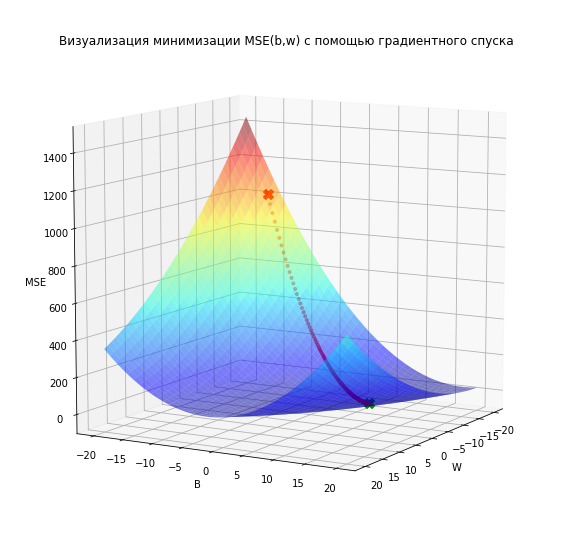

## **Простейшая программная релизация Градиентного спуска для парной линейной регрессии**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# смоделируем какие-нибудь данные, которые будут иметь линейную зависимость
x = np.random.rand(500, 1) # создаём np-массив из 1000 случайных чисел в диапазоне 0..1
b, w = 10, -5
y = b - w * x  + np.random.randn(500, 1) * 0.3 # строим функцию описывающие данные (пусть b и w будут 10 и -5) и добавляем немного гауссова шума (случайные факторы)

Визуализируем наши данные на графике

In [ ]:
plt.figure(figsize=(10, 10)) # figsize - размер графика
plt.plot(x, y, 'ro') # выведем наши данные
plt.show()

Найдём параметры модели $b$ и $w$ с помощью градиентного спуска.

In [ ]:
# сгенерируем начальные значения параметров из нормального распределения
w = np.random.randn(1) # вес (weight)
b = np.random.randn(1) # сдвиг (bias)
# скорость обучения
lr = 0.01
# количество эпох (количество итераций обновления наших параметров)
n_epochs = 10000

# будем сохранять каждую итерацию ошибки
mse_list = []

# основной цикл обучения модели
for epoch in range(n_epochs):

    # делаем предсказание с текущими коэффициентами b и w и данными x
    y_pred = b + w * x

    # посчитаем функцию ошибки MSE
    mse = np.mean(((y - y_pred)**2))

    # сохраним ошибку
    mse_list.append(mse)
    
    # считаем градиенты при текущих параметрах (смотреть формулы полученных производных выше)
    b_grad = -2 * (y - y_pred).mean() # для коэффициента b
    w_grad = -2 * ((y - y_pred)*x).mean() # для коэффициента w
    
    # обновляем параметры, используя коэффициент скорости обучения
    b = b - lr * b_grad
    w = w - lr * w_grad

    if epoch % 20==0:
      print('MSE: эпоха ', epoch, ': ', mse) # выведем ошибку каждую 20-ую итерацию обучения

In [ ]:
print('Найденный параметр b: ', b)
print('Найденный параметр w: ', w)

Визуализируем совместно график данных и полученную модель регрессии.

In [ ]:
y_pred = b+w*x # после нахождения параметров построим нашу линейную регрессию

plt.figure(figsize=(10, 10))
plt.plot(x, y, 'ro') # выведем наши данные
plt.plot(x, y_pred) # построим линейную регрессию
plt.show()

Визуализируем график наших ошибок в процессе обучения

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(range(n_epochs), mse_list, 'ro') # ось x - количество эпох(range(n_epochs)), ось y - наши ошибки(mse_list)
plt.title('Как менялась ошибка с каждой эпохой')
plt.show()

# **Нелинейные виды регрессии**

Но что если мы имеем нелинейную зависимость? Ведь практике вы не всегда будете иметь данные, которые можно хорошо аппроксимировать линейной функцией.

На самом деле мы можем изменить поведение нашей функции, сделав ее квадратичной, кубической или любой другой формой.

## **Полиноминальная**

Если наша линейная функция имела вид: $\hat{y} = b + w⋅x$

Мы можем её преобразовать в:
* квадратичную функцию: $\hat{y} = b + w_0⋅x + w_1⋅x^2$
* кубическую функцию: $\hat{y} = b + w_0⋅x + w_1⋅x^2 + w_2⋅x^3$

И вот такое представление нелинейной функции как множественной линейной позволяет нам без изменений воспользоваться алгоритмом градиентного спуска.

Пример данных с явной квадратичной функциональной зависимостью

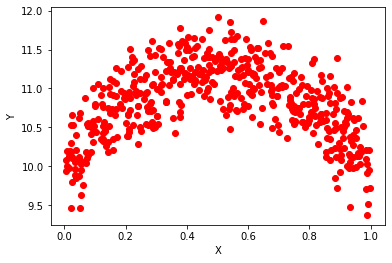

***Что если у нас несколько признаков $X = \{x_0, x_1, x_2...\}$ выражающие нелинейную зависимость?***

Например, для регрессии с двумя признаками.

* Линейная модель (полином степени 1): 
>$\hat{y} = b + w_0x_0 + w_1x_1$
* Квадратичная модель (полином степени 2): 
>$\hat{y} = b + w_0x_0 + w_1x_1 + (w_2x_0^2 + w_3x_0x_1 + w_4x_1^2)$
* Кубическая модель (полином степени 3): 
>$\hat{y} = b + w_0x_0 + w_1x_1 + (w_2x_0^2 + w_3x_0x_1 + w_4x_1^2) + (w_5x_0^3 + w_6x_0x_1^2 + w_7x_0^2x_1 + w_8x_1^3) $

## **Гиперболическая**

> $\hat{y}=b+(w/x)$


Пример данных с явной гиперболической функциональной зависимостью

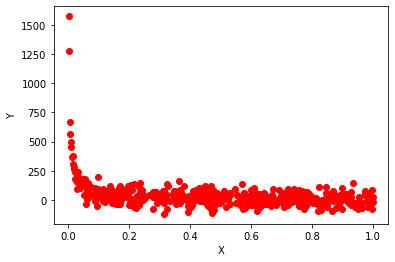

## **Показательная**

> $\hat{y}=b \cdot w^x$

Пример данных с явной показательной функциональной зависимостью

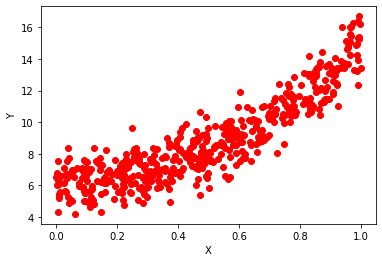

## **Экспоненциальная**

> $\hat{y} = e^{b+w⋅x}$

Пример данных с явной экспоненциальной функциональной зависимостью

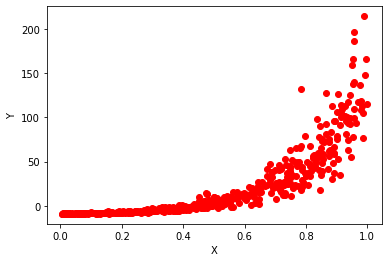

# **Задания**

В качестве примера вам поможет раздел "Простейшая программная релизация Градиентного спуска для парной линейной регрессии" и "Реализация градиентного спуска для минимизации функции ошибки $MSE(b,w)$ для парной линейной регрессии".

## **Вариант 1.**



У нас есть данные о количестве отработанных часов в неделю и сообщаемом уровне счастья (по шкале от 0 до 100) для 20 разных людей. Найдите функциональную зависимость уровня счасться $y$ от количества отработанных часов $x$. Пусть установлено, что зависимость между ними имеет полиноминальный характер (квадратичная зависимость).

**Требования:**

1. Визуализируйте имеющиеся данные на графике
2. Найдите параметры регрессионной модели $b$ и $w$ путём минимизации среднеквадратичной ошибки $MSE(b, w)$ с помощью градиентного спуска.
3. Визуализируйте совместно график данных и полученную модель регрессии.
4. Визуализируйте график на которой видно как менялась ошибка с каждой итерацией градиентного спуска.
5. Имея полученную модель c $b$ и $w$ предскажите значение $\hat{y}$ (уровень счастья) при $x=28$ (количество отработанных часов). Посмотрите насколько близким получилось ваше предсказание с реальным значением $y$. Реальное значение $y = 94.3743425$ при данном $x$.

> Необходимые данные с количество отработанных часов $x$ и соответственным уровнем счастья $y$ находятся в блоке кода ниже.

**Подсказки:**

* Используйте квадратичную модель: $\hat{y} = b + w_0⋅x + w_1⋅x^2$

* Ответ для проверки: $b=-30.3$, $w_0 = 7.2$, $w_1 = -0.1$ (Ваш ответ может слегка отличаться от истинных параметров, это нормально)

In [ ]:
# Количество отработанных часов
x = np.array([6, 9, 12, 12, 15, 17, 21, 24, 24, 27, 30, 32, 36, 39, 42, 45, 48, 51, 57, 60])
# Уровень счастья при соответствующих часах
y = np.array([ 8.09101123, 26.63756318, 43.14175005, 45.92634805, 55.43083705,
       63.80335312, 76.11847963, 84.36672354, 82.90842081, 91.17233418,
       94.4116184 , 98.1871826 , 96.40834265, 99.29222179, 93.72201352,
       92.1011422 , 82.55116089, 77.59438803, 55.62001874, 41.33021583])

## **Вариант 2.**

Имеются данные показателей «Объем продукции» $x$ (тыс. штук) и «Единичные издержки» $y$ (тыс. руб) (это издержки, приходящиеся на единицу выпускаемой продукции). Найдите функциональную зависимость между единичными издержками от объёмом произведенной продукции. Пусть установлено, что зависимость между ними имеет гиперболический характер.

**Требования:**

1. Визуализируйте имеющиеся данные на графике
2. Найдите параметры регрессионной модели $b$ и $w$ путём минимизации среднеквадратичной ошибки $MSE(b, w)$ с помощью градиентного спуска.
3. Визуализируйте совместно график данных и полученную модель регрессии.
4. Визуализируйте график на которой видно как менялась ошибка с каждой итерацией градиентного спуска.
5. Имея полученную модель c $b$ и $w$ предскажите значение $\hat{y}$ (единичные издержки) при $x=20$ (объём продукции). Посмотрите насколько близким получилось ваше предсказание с реальным значением $y$. Реальное значение $y = 16$ при данном $x$.

> Необходимые данные с объёмом продукции $x$ и соответственными единичными издержками $y$ находятся в блоке кода ниже.

**Подсказки:**

* Используйте гиперболическую модель: $\hat{y}=b+(w/x)$

* Ответ для проверки: $b=6.71$, $w = 163.96$ (Ваш ответ может слегка отличаться от истинных параметров, это нормально)

In [ ]:
x = np.array([48, 38, 43, 50, 33, 28, 35, 28, 22, 30, 25, 25, 22, 21])
y = np.array([10.3, 10.5, 10.6, 10.7, 11, 11.5, 12, 12.2, 12.5, 12.6, 13, 13.9, 14.4, 15.2])

## **Вариант 3.**

Eжегодно в населенном пункте наблюдается снижение численности населения.
Найдите функциональную закономерность между численностью населения $y$ и годом $x$. Пусть установлено, что зависимость между ними имеет показательный характер.

**Требования:**

1. Визуализируйте имеющиеся данные на графике
2. Найдите параметры регрессионной модели $b$ и $w$ путём минимизации среднеквадратичной ошибки $MSE(b, w)$ с помощью градиентного спуска.
3. Визуализируйте совместно график данных и полученную модель регрессии.
4. Визуализируйте график на которой видно как менялась ошибка с каждой итерацией градиентного спуска.
5. Имея полученную модель c $b$ и $w$ предскажите значение $\hat{y}$ (численность населения) при $x=22$ (это значит для 2022 года). Посмотрите насколько близким получилось ваше предсказание с реальным значением $y$. Реальное значение $y = 51.1$ при данном $x$.

> Необходимые данные с годам $x$ и соответственной численностью населения $y$ находятся в блоке кода ниже.

**Подсказки:**

* Используйте показательную модель: $\hat{y}=b \cdot w^x$

* Ответ для проверки: $b=103.5$, $w = 0.969$ (Ваш ответ может слегка отличаться от истинных параметров, это нормально)

In [ ]:
# Годы
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
# Численность населения для каждого года
y = np.array([101.8,  97.1,  95.7,  92.1,  88.7,  84.8,  81.1,  79.4,  76.8,
        75.4,  73.1,  69.2,  68.4,  65.8,  64.9,  62.2,  60.1,  58.4,
        58.1,  55.5,  53.])

## **Вариант 4.**

У нас есть данные массы бриллиантов $x$ и их стоимости $y$. Найдите функциональную зависимость стоимости бриллианта от его массы в виде модели регрессии. Пусть установлено, что зависимость между ними имеет экспоненциальный характер.

**Требования:**

1. Визуализируйте имеющиеся данные на графике
2. Найдите параметры регрессионной модели $b$ и $w$ путём минимизации среднеквадратичной ошибки $MSE(b, w)$ с помощью градиентного спуска.
3. Визуализируйте совместно график данных и полученную модель регрессии.
4. Визуализируйте график на которой видно как менялась ошибка с каждой итерацией градиентного спуска.
5. Имея полученную модель c $b$ и $w$ предскажите значение $\hat{y}$ (стоимость бриллианта) при $x=0.60237692$ (его массе). Посмотрите насколько близким получилось ваше предсказание с истиным значением $y$. Истинное значение $y = 3175.34637611$ (стоимость) при данном $x$ (массе).

> Необходимые данные с массой бриллиантов $x$ и с их соответственной стоимостью $y$ находятся в блоке кода ниже.

**Подсказки:**

* Используйте экспоненциальную модель: $\hat{y} = e^{b+w⋅x}$

* Ответ для проверки: $b=6.5$, $w = 2.5$ (Ваш ответ может слегка отличаться от истинных параметров, это нормально)

In [ ]:
# Масса бриллианта (один вектор признак - колонка)
x = np.array([0.6831959 , 0.25458259, 0.67354428, 0.74830613, 0.90739678,
       0.06290735, 0.16839531, 0.07119818, 0.29584922, 0.84051769,
       0.99741599, 0.71778914, 0.84714404, 0.39867692, 0.00473723,
       0.19515797, 0.58313993, 0.54521131, 0.02891357, 0.62185654,
       0.06057894, 0.4634715 , 0.02124199, 0.21881736, 0.69091361,
       0.44595423, 0.44023751, 0.33686769, 0.6587982 , 0.29263264,
       0.31404403, 0.81788651, 0.31189899, 0.83582828, 0.36755224,
       0.21713878, 0.99075022, 0.22865144, 0.59006634, 0.3274291 ,
       0.06192493, 0.44105918, 0.98927508, 0.12416194, 0.76481954,
       0.06342749, 0.88284818, 0.79940882, 0.89634089, 0.27545022,
       0.66782815, 0.31282714, 0.94528755, 0.3505917 , 0.13078033,
       0.42865987, 0.10672609, 0.32257667, 0.11124472, 0.67095367,
       0.20620607, 0.31236211, 0.75648501, 0.58250717, 0.73358102,
       0.73830706, 0.43125426, 0.58802052, 0.97980417, 0.4660172 ,
       0.6554308 , 0.95263401, 0.45736879, 0.53784394, 0.35256428,
       0.66130454, 0.09988696, 0.33070248, 0.36193415, 0.67583453,
       0.36970363, 0.69452546, 0.02939772, 0.66806118, 0.75622945,
       0.12861229, 0.27140559, 0.47572908, 0.20046112, 0.02247425,
       0.16143744, 0.65309753, 0.35869316, 0.45083235, 0.67005189,
       0.17758147, 0.58231079, 0.73645021, 0.86441219])

# Стоимость бриллиантов (целевой вектор признак - колонка)
y = np.array([ 4202.27140758,  1048.00429624,  3559.61471675,  4268.78115297,
        4827.21522722,   880.96135823,   906.80757612,   701.05224513,
        1579.55668945,  5443.75092094,  6666.49770578,  4151.76084197,
        5526.62468583,  1925.20262991,   651.94842491,  1006.14855486,
        3292.32797743,  2715.58263709,   617.46595473,  2819.93960765,
        1053.30969989,  2037.40740842,   682.2738903 ,  1503.2987091 ,
        3052.70388609,  1530.6617565 ,  3045.19156367,  1452.06569191,
        3444.299013  ,  1477.03599097,  1470.8705949 ,  4124.78906891,
        1107.72959289,  5728.11209103,  1456.33429815,   807.52129543,
        9376.71903183,  1283.44753382,  2960.54976957,  1307.95523321,
         815.14992123,  2198.30018159, 12048.11979255,   978.39652106,
        4051.11260865,   748.34989044,  6836.57033278,  5103.48962728,
        4276.62933577,  1178.77483245,  3491.20866576,  1270.52722773,
        5527.14071774,  1136.24378178,  1395.9901034 ,  1812.98153522,
         858.48927373,  1294.02903657,   937.79706412,  3100.59803684,
        1092.26384023,  1087.2067898 ,  3590.52622572,  1968.6438898 ,
        5768.30663329,  3382.62983174,  1905.49705482,  2991.27314895,
       10864.12903023,  2424.09034666,  2441.55525994,  6211.76128177,
        2090.69383603,  2050.07873383,  1355.56587375,  4712.83089618,
         508.61315703,  1357.93084028,  1693.34412468,  4004.02646131,
        1418.49737981,  5399.47599715,   501.10585941,  3830.36534842,
        4797.31976234,   944.69922133,  1767.368758  ,  2094.57915139,
        1082.17027822,  1110.09170937,   797.06686217,  3364.74611171,
        1464.25709568,  1550.53558302,  4595.81721383,  1146.14511085,
        4656.01714901,  3638.1124629 ,  7948.5540399])